In [1]:
""" 
This module is gonna be the center of control of my programm. That's where I am gonna lunch the execution of the different parts of the code. Depending on what I want to do I will run part(s) of the project or the whole one. For instance, if I want to test the complete programm I will be able to run all with one click. At the opposite, if I want to test a new module functionnning, I will run this one only. 

"""

" \nThis module is gonna be the center of control of my programm. That's where I am gonna lunch the execution of the different parts of the code. Depending on what I want to do I will run part(s) of the project or the whole one. For instance, if I want to test the complete programm I will be able to run all with one click. At the opposite, if I want to test a new module functionnning, I will run this one only. \n\n"

In [2]:
#src.useful_functions

if __name__ == '__main__':
    import useful_functions

<font color="green">Convert csv into dataframe</font>

In [3]:
#src.data.make_dataset

if __name__ == '__main__':
    from data import make_dataset

files = [make_dataset.adr1, make_dataset.adr2, make_dataset.adr3, make_dataset.adr4, 
         make_dataset.adr5, make_dataset.adr6, make_dataset.adr7, make_dataset.adr8, 
         make_dataset.adr9]

# convert csv files into a big dataframe
dataset_to_save = make_dataset.read_data(files)

# We save the dataframe created into data/interim folder, after having deleted the old one.
make_dataset.save_dataframe_into_data_interim(dataset_to_save)

#Open the dataframe saved
dataset_01 = make_dataset.load_data(seasons_present_in_df_info=True)

The old data_interim.pkl file, and the new one ARE the same
The old 'data_interim.pkl' file was well deleted
The new 'data_interim.pkl' file was well saved 

This dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020 2021 2022 2023]


# 1. <u> Raw data visualisation/cleaning and new features creation </u>

<font color="green">Visualize raw data histograms</font>


In [4]:
#src.visualization.visualize
"""
if __name__ == '__main__':
    from visualization import visualize


#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.

visualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)
"""

"\nif __name__ == '__main__':\n    from visualization import visualize\n\n\n#There are several functions to run in this module that are very specific. They are made to identify specific features outliers. We better have to go to the module to run it.\n\nvisualize.plot_all_num_features(dataset_01.copy(), save = False, density_estimate = False)\n"

<font color="green">Create columns into dataset:</font>

In [5]:
#features.initialize_new_features_columns

if __name__ == '__main__':
    from features import initialize_new_features_columns

#We create the new columns in dataset and stock the columns ranks variables into dico_col_rk
dataset_02, dico_col_rk = initialize_new_features_columns.add_columns_and_complete_col_ranks(dataset_01.copy())

#We execute a test to verify the columns and columns ranks variables have been correcctly created
initialize_new_features_columns.test_columns_ranks(dico_col_rk, theoritical_df_col_nb = 190, dataset_0 = dataset_02.copy())


the function add_columns_and_complete_col_ranks() was executed correctly


True

<span style="color:#FF1493;">
<font size="3"> 
<strong>
    Création/Manipulation des Statistiques de Resultat
</span style="color:#FF1493;"> </font size="4"> </strong>

(pm = pre-match)
(sbos = since the beginning of the season)

In [6]:
#src.features.make_new_features
if __name__ == '__main__':
    from features import make_new_features


#We add the matchs results 
dataset_03 = make_new_features.matchs_results(dataset_02.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['RH',
                                            'RA'], dataset_02.copy(), dataset_03.copy(), 'dataset_02', 'dataset_03')


#We add the Home or Away status of the teams
dataset_04 = make_new_features.home_away_status(dataset_03.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_H_A_status',
                                            'AT_H_A_status'], dataset_03.copy(), dataset_04.copy(), 'dataset_03', 'dataset_04')

#Calculation and manipulation of NB DE MATCHS et NB DE VICTOIRES (pm, sbos)
#VARIABLES                    V 
# We add the number of matches and number of victories
dataset_05 = make_new_features.nb_matchs_nb_victories(dico_col_rk.copy(), dataset_04.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_played_matchs_nb',
                                            'AT_played_matchs_nb',
                                            'HT_victories_nb',
                                            'AT_victories_nb'], dataset_04.copy(), dataset_05.copy(), 'dataset_04', 'dataset_05')

#Calculation and manipulation of VICTORY (pm, sbos):
#VARIABLE                     X
#PER MATCH AVG                V 
#PER MATCH AVG HT/AT DIFF     V
#We add the avg victories per match and its HT-AT difference
dataset_06 = make_new_features.victories_per_match_AVG_and_DIFF(dataset_05.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_victory_pm',
                                            'AT_avg_victory_pm',
                                            'Diff_HT_avg_victory_pm',
                                            'Diff_AT_avg_victory_pm'], dataset_05.copy(), dataset_06.copy(), 'dataset_05', 'dataset_06')

#(POINTS COLLECTED x (1 + ADVERSARY AVG VICTORY PER MATCH)) (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the avg points per match ponderated by adversary perf, and its HT-AT difference
dataset_07 = make_new_features.points_pm_ponderated_by_adversary_perf(dico_col_rk.copy(), dataset_06.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_points_ponderated_by_adversary_perf',
                                            'AT_points_ponderated_by_adversary_perf',
                                            'HT_avg_pm_points_ponderated_by_adversary_perf',  
                                            'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf'], dataset_06.copy(), dataset_07.copy(), 'dataset_06', 'dataset_07')

#Calculation and manipulation of NB OF SCORED GOALS and NB CONCEEDED GOALS (pm, sbos)
#VARRIABLE                    V
#We add the nb of goals scored and conceeded
dataset_08 = make_new_features.scored_and_conceeded_goals(dico_col_rk.copy(), dataset_07.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['scored_goals_HT_PM',
                                            'conceeded_goals_HT_PM',
                                            'scored_goals_AT_PM',  
                                            'conceeded_goals_AT_PM'], dataset_07.copy(), dataset_08.copy(), 'dataset_07', 'dataset_08')


#GOAL DIFFERENCE (pm, sbos): 
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the goal difference
dataset_09 = make_new_features.goal_difference(dataset_08.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['goal_diff_HT_PM',
                                            'goal_diff_AT_PM',
                                            'HT_avg_goal_diff_pm',  
                                            'AT_avg_goal_diff_pm',
                                            'Diff_HT_goal_diff_pm',
                                            'Diff_AT_goal_diff_pm'], dataset_08.copy(), dataset_09.copy(), 'dataset_08', 'dataset_09')


#SCORED GOALS / CONCEEDED GOALS (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                X 
#HT/AT DIFF                   V
#We add the ratio scored goals/conceeded goals
dataset_10 = make_new_features.scored_conceeded_goals_ratio(dataset_09.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_avg_scored_g_conceedded_g_ratio',
                                            'AT_avg_scored_g_conceedded_g_ratio',
                                            'Diff_HT_avg_scored_g_conceedded_g_ratio',  
                                            'Diff_AT_avg_scored_g_conceedded_g_ratio'], dataset_09.copy(), dataset_10.copy(), 'dataset_09', 'dataset_10')


#POINTS NB (pm, sbos):
#VARIABLE                     V
#PER MATCH AVG                V
#PER MATCH AVG HT/AT DIFF     V
#We add the points number
dataset_11 = make_new_features.points_nb(dico_col_rk.copy(),dataset_10.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Prematch_HT_PN',
                                            'Prematch_AT_PN',
                                            'HT_avg_collected_points_pm',  
                                            'AT_avg_collected_points_pm',
                                            'Diff_pnt_HT_AT_ratio',
                                            'Diff_pnt_AT_HT_ratio'], dataset_10.copy(), dataset_11.copy(), 'dataset_10', 'dataset_11')



#RANKING (pm, sbos) :
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add ranks prematch
dataset_12 = make_new_features.ranking(dico_col_rk.copy(), dataset_11.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_week_ranking',
                                            'AT_week_ranking',
                                            'Diff_HT_ranking',  
                                            'Diff_AT_ranking'], dataset_11.copy(), dataset_12.copy(), 'dataset_11', 'dataset_12')


#ANNUAL BUDGET:
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the annual budgets of teams
dataset_13 = make_new_features.annnual_budget(dataset_12.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['annual budget of HT',
                                            'annual budget of AT',
                                            'Diff_HT_annual_budget',  
                                            'Diff_AT_annual_budget'], dataset_12.copy(), dataset_13.copy(), 'dataset_12', 'dataset_13')
#We test if there is no 0 values in the columns
useful_functions.is_there_x_values(0, ['annual budget of HT','annual budget of AT'], dataset_13.copy())


#POINTS NB ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the points nb on 1,3,5 last matchs
dataset_14 = make_new_features.points_nb_on_x_last_matchs(dico_col_rk.copy(), dataset_13.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['Points_HT_5lm_PM',
                                            'Points_AT_5lm_PM',
                                            'Points_HT_3lm_PM',
                                            'Points_AT_3lm_PM',
                                            'Points_HT_1lm_PM',
                                            'Points_AT_1lm_PM',
                                            'HT_Diff_Points_5lm',  
                                            'AT_Diff_Points_5lm',
                                            'HT_Diff_Points_3lm',
                                            'AT_Diff_Points_3lm',
                                            'HT_Diff_Points_1lm',
                                            'AT_Diff_Points_1lm'], dataset_13.copy(), dataset_14.copy(), 'dataset_13', 'dataset_14')


#GOAL DIFF ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   V
#We add the goal diff on 1,3,5 last matches
dataset_15 = make_new_features.goal_diff_on_x_last_matchs(dico_col_rk.copy(), dataset_14.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['GoalDiff_HT_5lm_PM',
                                            'GoalDiff_AT_5lm_PM',
                                            'GoalDiff_HT_3lm_PM',
                                            'GoalDiff_AT_3lm_PM',
                                            'GoalDiff_HT_1lm_PM',
                                            'GoalDiff_AT_1lm_PM',
                                            'HT_Diff_Goal_Diff_5lm',  
                                            'AT_Diff_Goal_Diff_5lm',
                                            'HT_Diff_Goal_Diff_3lm',
                                            'AT_Diff_Goal_Diff_3lm',
                                            'HT_Diff_Goal_Diff_1lm',
                                            'AT_Diff_Goal_Diff_1lm'], dataset_14.copy(), dataset_15.copy(), 'dataset_14', 'dataset_15')


#RANKING ON 1,3,5 LAST MATCHES (pm)
#VARIABLE                     V
#PER MATCH AVG                X
#HT/AT DIFF                   X
#We add the ranking on 1,3,5 last matches
dataset_16 = make_new_features.ranking_on_x_last_matchs(dico_col_rk.copy(), dataset_15.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_5lm_week_ranking',
                                            'AT_5lm_week_ranking',
                                            'HT_3lm_week_ranking',
                                            'AT_3lm_week_ranking',
                                            'HT_1lm_week_ranking',
                                            'AT_1lm_week_ranking',
                                            ], dataset_15.copy(), dataset_16.copy(), 'dataset_15', 'dataset_16')


The DataFrames dataset_02 and dataset_03 are equal except for columns ['RH', 'RA']


The DataFrames dataset_03 and dataset_04 are equal except for columns ['HT_H_A_status', 'AT_H_A_status']
The DataFrames dataset_04 and dataset_05 are equal except for columns ['HT_played_matchs_nb', 'AT_played_matchs_nb', 'HT_victories_nb', 'AT_victories_nb']
The DataFrames dataset_05 and dataset_06 are equal except for columns ['HT_avg_victory_pm', 'AT_avg_victory_pm', 'Diff_HT_avg_victory_pm', 'Diff_AT_avg_victory_pm']
The DataFrames dataset_06 and dataset_07 are equal except for columns ['HT_points_ponderated_by_adversary_perf', 'AT_points_ponderated_by_adversary_perf', 'HT_avg_pm_points_ponderated_by_adversary_perf', 'AT_avg_pm_points_ponderated_by_adversary_perf', 'HT_Diff_points_ponderated_by_adversary_perf', 'AT_Diff_points_ponderated_by_adversary_perf']
The DataFrames dataset_07 and dataset_08 are equal except for columns ['scored_goals_HT_PM', 'conceeded_goals_HT_PM', 'scored_goals_AT_PM', 'conceeded_goals_AT_PM']
The DataFrames dataset_08 and dataset_09 are equal except for c

True

<span style="color:#FF1493;">
<font size="3"> 
<strong>
    Création/Manipulation des Statistiques de Jeu

In [7]:
#src.features.make_new_features

#CORNERS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_17 = make_new_features.corners_nb(dico_col_rk.copy(), dataset_16.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_corners_nb',
                                            'AT_corners_nb',
                                            'HT_Diff_avg_corners_nb',
                                            'AT_Diff_avg_corners_nb'], dataset_16.copy(), dataset_17.copy(), 'dataset_16', 'dataset_17')

#YELLOW, RED CARDS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               X
#PER MATCH AVG HT/AT DIFF    V
dataset_18 = make_new_features.yellow_red_cards(dico_col_rk.copy(), dataset_17.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_yellow_cards_nb',
                                            'AT_yellow_cards_nb',
                                            'HT_red_cards_nb',
                                            'AT_red_cards_nb',
                                            'HT_Diff_avg_yellow_cards_nb',
                                            'AT_Diff_avg_yellow_cards_nb',
                                            'HT_Diff_avg_red_cards_nb',
                                            'AT_Diff_avg_red_cards_nb',], dataset_17.copy(), dataset_18.copy(), 'dataset_17', 'dataset_18')

#SHOTS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_19 = make_new_features.shots_nb(dico_col_rk.copy(), dataset_18.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_nb',
                                            'AT_shots_nb',
                                            'HT_avg_shots_nb',
                                            'AT_avg_shots_nb',
                                            'HT_Diff_avg_shots_nb',
                                            'AT_Diff_avg_shots_nb'], dataset_18.copy(), dataset_19.copy(), 'dataset_18', 'dataset_19')

#SHOTS ON TARGET NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_20 = make_new_features.shots_on_target_nb(dico_col_rk.copy(), dataset_19.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_shots_on_target_nb',
                                            'AT_shots_on_target_nb',
                                            'HT_avg_shots_on_target_nb',
                                            'AT_avg_shots_on_target_nb',
                                            'HT_Diff_avg_shots_on_target_nb',
                                            'AT_Diff_avg_shots_on_target_nb'], dataset_19.copy(), dataset_20.copy(), 'dataset_19', 'dataset_20')

#FOULS NB (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_21 = make_new_features.fouls_nb(dico_col_rk.copy(), dataset_20.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_fouls_nb',
                                            'AT_fouls_nb',
                                            'HT_avg_fouls_nb',
                                            'AT_avg_fouls_nb',
                                            'HT_Diff_avg_fouls_nb',
                                            'AT_Diff_avg_fouls_nb'], dataset_20.copy(), dataset_21.copy(), 'dataset_20', 'dataset_21')

#POSSESSION (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_22 = make_new_features.possession(dico_col_rk.copy(), dataset_21.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_possession',
                                            'AT_possession',
                                            'HT_avg_possession',
                                            'AT_avg_possession',
                                            'HT_Diff_avg_possession',
                                            'AT_Diff_avg_possession'], dataset_21.copy(), dataset_22.copy(), 'dataset_21', 'dataset_22')

#EXPECTED GOALS / XG (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_23 = make_new_features.expected_goals(dico_col_rk.copy(), dataset_22.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_xg',
                                            'AT_xg',
                                            'HT_avg_xg',
                                            'AT_avg_xg',
                                            'HT_Diff_avg_xg',
                                            'AT_Diff_avg_xg'], dataset_22.copy(), dataset_23.copy(), 'dataset_22', 'dataset_23')

The DataFrames dataset_16 and dataset_17 are equal except for columns ['HT_corners_nb', 'AT_corners_nb', 'HT_Diff_avg_corners_nb', 'AT_Diff_avg_corners_nb']
The DataFrames dataset_17 and dataset_18 are equal except for columns ['HT_yellow_cards_nb', 'AT_yellow_cards_nb', 'HT_red_cards_nb', 'AT_red_cards_nb', 'HT_Diff_avg_yellow_cards_nb', 'AT_Diff_avg_yellow_cards_nb', 'HT_Diff_avg_red_cards_nb', 'AT_Diff_avg_red_cards_nb']
The DataFrames dataset_18 and dataset_19 are equal except for columns ['HT_shots_nb', 'AT_shots_nb', 'HT_avg_shots_nb', 'AT_avg_shots_nb', 'HT_Diff_avg_shots_nb', 'AT_Diff_avg_shots_nb']
The DataFrames dataset_19 and dataset_20 are equal except for columns ['HT_shots_on_target_nb', 'AT_shots_on_target_nb', 'HT_avg_shots_on_target_nb', 'AT_avg_shots_on_target_nb', 'HT_Diff_avg_shots_on_target_nb', 'AT_Diff_avg_shots_on_target_nb']
The DataFrames dataset_20 and dataset_21 are equal except for columns ['HT_fouls_nb', 'AT_fouls_nb', 'HT_avg_fouls_nb', 'AT_avg_fouls_nb',

True

<span style="color:#FF1493;">
<font size="3"> 
<strong>
    Création/Manipulation des Statistiques de Côte

In [8]:
#src.features.make_new_features

# 1/VICTORY ODDS  (pm, sbos)
#VARIABLE                    V
#PER MATCH AVG               V
#PER MATCH AVG HT/AT DIFF    V
dataset_24 = make_new_features.odds_victory_proba(dico_col_rk.copy(), dataset_23.copy())
#We test if the previous action has not modified other col than the ones filled with their values
useful_functions.compare_2_df_excepted_col(['HT_odds_victory_proba',
                                            'AT_odds_victory_proba',
                                            'HT_avg_odds_victory_proba',
                                            'AT_avg_odds_victory_proba',
                                            'HT_Diff_avg_odds_victory_proba',
                                            'AT_Diff_avg_odds_victory_proba'], dataset_23.copy(), dataset_24.copy(), 'dataset_23', 'dataset_24')

The DataFrames dataset_23 and dataset_24 are equal except for columns ['HT_odds_victory_proba', 'AT_odds_victory_proba', 'HT_avg_odds_victory_proba', 'AT_avg_odds_victory_proba', 'HT_Diff_avg_odds_victory_proba', 'AT_Diff_avg_odds_victory_proba']


True

# 2. <u> Data exploration </u>

<font color="green">Evaluating feature relevancy by computing their correlation with matchs results

c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mbappe Cookiestructure\src\features\features_correlation.py:88: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_01 = dataset_01[dataset_0["Game Week"]>= min_week_game]


Corrélation de point bisérial pour HT_Diff_avg_odds_victory_proba: 0.32675
Valeur de p : 5.4102652115159216e-107
Moyenne feature pour Resultat = 1:  0.07607735543612924
Moyenne feature pour Resultat = 0:  -0.04491109309761088


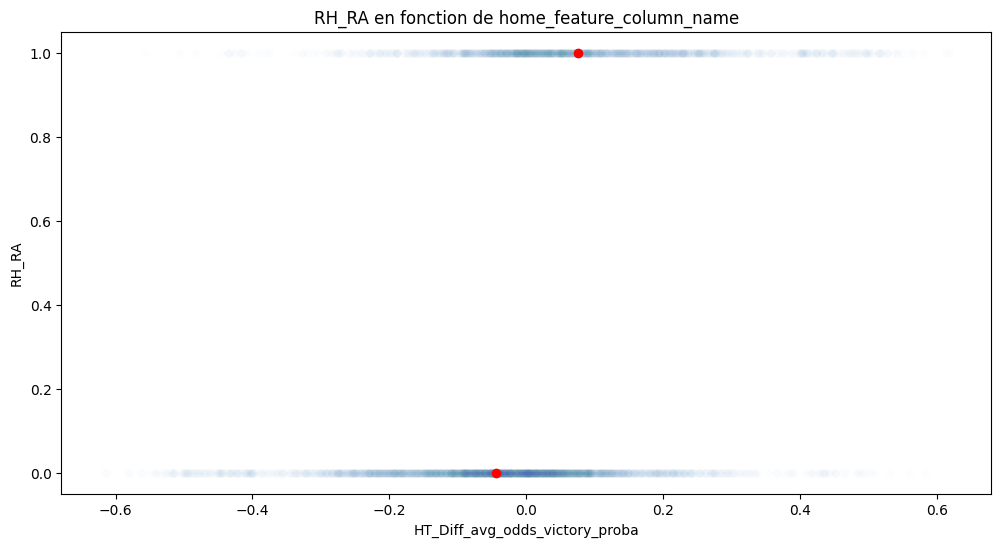

In [9]:
#src.features.features_correlation


from features import features_correlation
import pandas as pd

"""
features_correlation.plot_feature_stats_over_game_weeks("Diff_pnt_HT_AT_ratio", "Diff_pnt_AT_HT_ratio", dataset_24.copy())
"""

features_correlation.feature_correlation_with_results_analysis( "HT_Diff_avg_odds_victory_proba", "AT_Diff_avg_odds_victory_proba", 999, 7, pd.to_datetime("07/15/2016"), dataset_24.copy())

In [10]:
#BLOC TEST

#A supprimer quand les tests sur les avg des features Diff auront été faits
import pandas as pd

from data import constant_variables

Home_Away_Features = pd.concat([dataset_24["annual budget of HT"], dataset_24["annual budget of AT"]], axis=0, ignore_index=True)
Game_Week = pd.concat([dataset_24['Game Week'], dataset_24['Game Week']], axis=0, ignore_index=True) 
concatenated_df = pd.DataFrame({'Home_Away_Features': Home_Away_Features,'Game Week': Game_Week})



def hhh(wee, ht_f, at_f):
    for season in constant_variables.seasons:
        restricted_dataframe = dataset_24[dataset_24['date_GMT'].dt.year == season.year]
        
        Home_Away_Features = pd.concat([restricted_dataframe[ht_f], restricted_dataframe[at_f]], axis=0, ignore_index=True)
        Game_Week = pd.concat([restricted_dataframe['Game Week'], restricted_dataframe['Game Week']], axis=0, ignore_index=True) 
        concatenated_df = pd.DataFrame({'Home_Away_Features': Home_Away_Features,'Game Week': Game_Week})
        
        y_mean_gw_28 = [concatenated_df[concatenated_df['Game Week'] == wee]['Home_Away_Features'].mean()]
        
        print(f'the average budget of teams at the {wee}th GW the season {season} is {y_mean_gw_28}')
    print('\n \n')



vv = [5,6,7,8]

for dd in vv:
    hhh(dd, "Diff_pnt_HT_AT_ratio", "Diff_pnt_AT_HT_ratio")


the average budget of teams at the 5th GW the season 2015-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2016-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2017-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2018-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2019-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2020-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2021-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2022-07-15 00:00:00 is [0.0]
the average budget of teams at the 5th GW the season 2023-07-15 00:00:00 is [nan]

 

the average budget of teams at the 6th GW the season 2015-07-15 00:00:00 is [1.1102230246251566e-17]
the average budget of teams at the 6th GW the season 2016-07-15 00:00:00 is [0.0]
the average budget of teams at the 6th GW the season 2017-07-15 00:00:00 is

<font color="green">Definition of restricted datasets with a selection of revelevant features<font color="red">

In [11]:
#src.features.make_dataset

#On créé des dataframes qui réunissent les colonnes qui représentent la meme feature pour HT et AT. Easier to study feature per feature
dataset_restricted_2, dataset_restricted_3 = make_dataset.restricted_datasets(dataset_24.copy())